In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Entropía de una Bernoulli

In [2]:
def entropia_bernoulli(p):
    if p == 0:
        p = p+1e-10
    elif p==1:
        p = p-1e-10
    return round(-(p*np.log2(p) + (1-p)*np.log2(1-p) ),6)

In [3]:
entropia_bernoulli(0)

0.0

In [4]:
entropia_bernoulli(0.5)

1.0

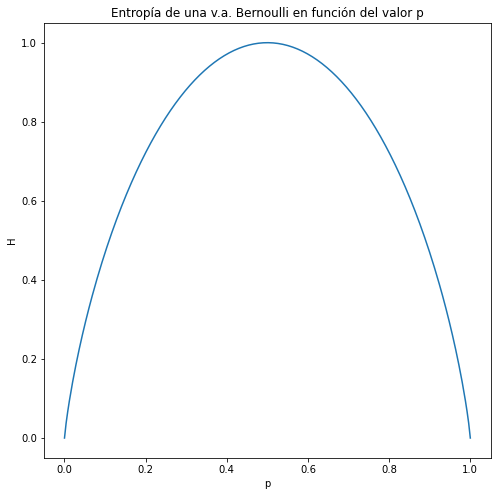

In [5]:
f, ax = plt.subplots(figsize=(8,8))
e = 1e-10
p = np.linspace(0+e,1-e,250)
h = [entropia_bernoulli(x) for x in p]
ax.plot(p,h)
ax.set_ylabel('H')
ax.set_xlabel('p')
ax.set_title('Entropía de una v.a. Bernoulli en función del valor p')
plt.show()

# Entropía de un dado balanceado

In [6]:
def entropia_dado(n=6):
    '''
    n <int>
    '''
    assert isinstance(n,int),'Un dado solo puede tener una cantidad entera positiva de caras.'
    return np.log2(n)

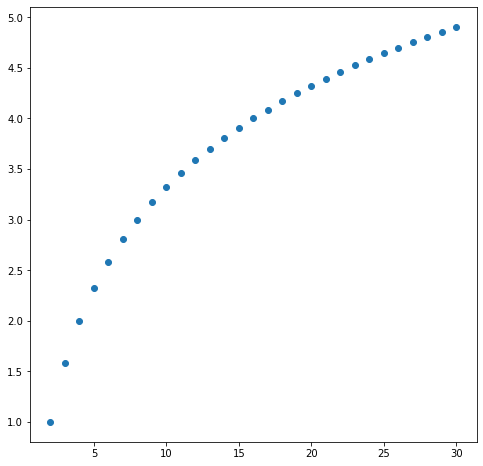

In [7]:
caras = [x for x in range(2,31,1)]
entropias = [entropia_dado(x) for x in caras]
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(caras,entropias)
plt.show()

# Ejercicio MSFT vs AAPL

Verificar si las acciones de Apple y Microsoft, en los últimos 6 meses, se comportaron distinto en cuanto a su precio medio de cierre, usar $\alpha = 0.05$. 

In [ ]:
from scipy import stats

In [2]:
msft = pd.read_csv('MSFT.csv')
aapl = pd.read_csv('AAPL.csv')

In [76]:
#Media móvil
msft_close_filtrado = np.convolve(msft.Close,1/20*np.ones(shape=(20,)))
msft_filt_muestra = msft_close_filtrado[20:-20]

#Filtro de outliers por criterio de IQR
msftq1,msftq3 = np.quantile(msft_filt_muestra,.25),np.quantile(msft_filt_muestra,.75)
msft_iqr = msftq3 - msftq1
msft_out_high = msftq3 + 1.5*msft_iqr
msft_out_low = msftq1 - 1.5*msft_iqr
msft_final = msft_filt_muestra[(msft_filt_muestra > msft_out_low) & (msft_filt_muestra < msft_out_high)]

#Normalización con datos muestrales
msft_final = (msft_final - msft_final.mean()) / msft_final.std()

In [78]:
#Media móvil
appl_close_filtrado = np.convolve(aapl.Close,1/20*np.ones(shape=(20,)))
aapl_filt_muestra = appl_close_filtrado[20:-20]

#Filtro de outliers por criterio de IQR
aaplq1,aaplq3 = np.quantile(aapl_filt_muestra,.25),np.quantile(aapl_filt_muestra,.75)
aapl_iqr = aaplq3 - aaplq1
aapl_out_high = aaplq3 + 1.5*aapl_iqr
aapl_out_low = aaplq1 - 1.5*aapl_iqr
aapl_final = aapl_filt_muestra[(aapl_filt_muestra > aapl_out_low) & (aapl_filt_muestra < aapl_out_high)]

#Normalización con datos muestrales
aapl_final = (aapl_final - aapl_final.mean()) / aapl_final.std()

In [79]:
# Calcula el estadístico del test
t,_ = stats.ttest_ind(msft_final,aapl_final)

In [83]:
tdist = stats.t

In [89]:
# Grados de libertad
df = len(msft_final)+len(aapl_final)-2

In [92]:
# Extremos del intervalo de confianza
icmin,icmax = -tdist.ppf(q=1-0.05/2,df=df),tdist.ppf(q=1-0.05/2,df=df)

In [95]:
# Test
if (t>icmin) & (t<icmax):
    print("El estadístico está dentro del IC calculado")
else:
    print("El estadístico no está dentro del IC calculado")

El estadístico está dentro del IC calculado


No podemos rechazar $H_0$ de igualdad de medias. 

# Ejercicio 2 

Sea $X \sim \mathcal{B}(p)$ una v.a. Bernoulli con parámetro p.

In [49]:
def relu(x):
    if x >= 0:
        return x
    else:
        return 0
    
def informacion_evento(p):
    return relu(round(np.log2(1/(p+1e-12)),5))


## Información de cada símbolo

In [50]:
# Sea una v.a. Bernoulli con parámetro p = 1
p = 1
informacion_evento(p), informacion_evento(1-p)

(-0.0, 39.86314)

## Interpretación de la información de $X_2$

Considerado:
* Se define a la información de un evento como $I(E) = log_2\frac{1}{P(E)}$.
* Para una v.a. $\sim \mathcal{B}(p)$ con dos posibles resultados: $x_1$ con probabilidad p y $x_2$ con probabilidad 1-p. 

Se tiene que $\frac{lim}{p\rightarrow1}I(X_2)\rightarrow \infty$

Para tener una comprensión más intuitiva de lo que se trata se cambia la interpretación de la función $I(\cdot)$, como es sugerido en el apunte: https://web.stanford.edu/class/ee376a/files/2017-18/lecture_3.pdf

En lugar de hablar de la "información", se interpreta como una medida de "sorpresa", qué tan inesperada era la ocurrencia del evento. Esta interpretación está alineada con la función ya que eventos de alta probabilidad generan una baja sorpresa y eventos de baja probabilidad, una sorpresa mayor.

Por lo tanto, a medida que $p\rightarrow1$ la probabilidad de $x_2$ disminuye tendiendo a 0, por lo que la "sorpresa" de que ocurra aumenta.  

## Encontrar la entropía de X

Este ejercicio está resuelto al comienzo de la notebook.